In [1]:
# Delivery time Prediction


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read data 
del_time=pd.read_csv("delivery_time.csv")

In [4]:
del_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
del_time.shape

(21, 2)

In [6]:
del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


In [7]:
del_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
del_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#  preparing model

In [9]:
x=del_time["Sorting Time"]
X=np.array(x)

In [10]:
X

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

In [11]:
y=del_time["Delivery Time"]
Y=np.array(y)

In [12]:
XZ=X.reshape(-1,1)

In [13]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(XZ,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
model1.intercept_

6.58273397199706

In [15]:
y_pred=model1.predict(XZ)

In [16]:
y_pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

# Evaluation

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
mean_squared_error(Y,y_pred)

7.793311548584063

In [19]:
r2_score(Y,y_pred)

0.6822714748417231

Text(0, 0.5, 'Delivery Time')

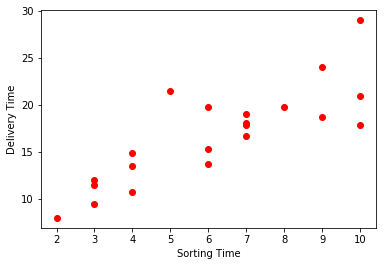

In [20]:
plt.scatter(X,Y,color="red")

plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

Text(0, 0.5, 'Delivery Time')

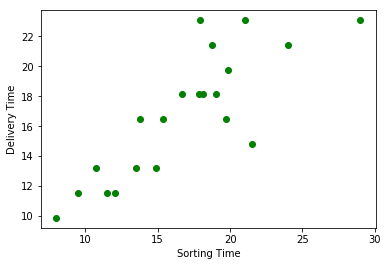

In [21]:
plt.scatter(Y,y_pred,color="green")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

# ====================================================

# Salary Prediction

# Read Data

In [22]:
sal=pd.read_csv("Salary_Data.csv")

In [23]:
sal


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [24]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [25]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [26]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [27]:
import seaborn as sns

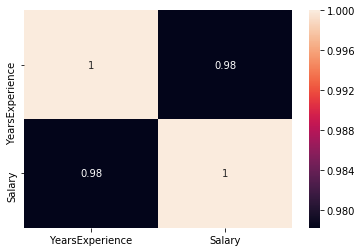

In [28]:
sns.heatmap(sal.corr(),annot=True)

# model creation

In [29]:
import  statsmodels.formula.api as smf

In [30]:
model2=smf.ols('Salary~YearsExperience',data=sal).fit()

In [31]:
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        07:21:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [34]:
model2.tvalues



Intercept          11.346940
YearsExperience    24.950094
dtype: float64